# Иследование вакансий

## Описание проекта

Анализ данных вакансий HH.ru по специальностям Системных аналитик и Аналитик данных.

**Цель проекта:** Выявить различия в предлагаемых вакансиях для Аналитиков данных и Системных аналитиков.

## Описание данных

Данные получены из API **HH.ru**.
Ссылка на данные: https://disk.yandex.ru/d/eA4zuI8qPag-KQ

Описание полей в данных:
- **id** - Уникальный идентификатор вакансии.
- **name** - Название вакансии.
- **published_at** - Дата публикации.
- **alternate_url** - Ссылка на вакансию.
- **type** - Статус вакансии на момент получения данных от api и передачи их в базу.
- **employer** - Работодатель.
- **department** - Работодатель, отдел.
- **area** - Регион места работы.
- **experience** - Требуемый опыт работы.
- **key_skills** - Ключевые навыки, в том числе найденные при анализе полного текста вакансии. Поле генерируется после получения информации от api.
- **schedule** - График работы.
- **employment** - Тип занятости.
- **description** - Описание вакансии.
- **description_lemmatized** - Лемматизированное описание вакансии.
- **salary_from** - Нижняя граница предлагаемой заработной платы.
- **salary_to** - Верхняя граница предлагаемой заработной платы.
- **salary_bin** - Категория зарплаты.
- **key_skills_from_key_skills_field** - Ключевые навыки из поля вакансии **key_skills**.
- **hard_skills_from_description** - “Твердые” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.
- **soft_skills_from_description** - “Мягкие” навыки, найденные при обработке полей с навыками. Поле генерируется после получения информации от api.

## План проекта

- Предобработка данных.
- Исследовательский анализ данных.
- Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.  Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик.
- Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, фзарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
- Определение,  какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.
- Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
- Формулирование выводов и рекомендаций.

## Изучение данных

Импортируем библиотеки:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

Считаем данные из csv-файла в датафреймы и сохраним в переменные data_da и data_sa:

In [ ]:
try:
    data_da = pd.read_excel('C:/Users/888/OneDrive/Рабочий стол/Мастерская/vacancies_da.xlsx')
    data_sa = pd.read_excel('C:/Users/888/OneDrive/Рабочий стол/Мастерская/vacancies_sa.xlsx')
except:
    data_da = pd.read_excel('https://disk.yandex.ru/i/uW2yXp4PwLDQTQ')
    data_sa = pd.read_excel('https://disk.yandex.ru/i/CH0MfzWsr38LuQ')

Выведем первые 3 строки датафреймов:

In [ ]:
display(data_da.head(3))
display(data_sa.head(3))

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100039284,Junior аналитик данных (исследователь),2024-05-24 09:37:04,https://hh.ru/vacancy/100039284,Открытая,DNS Головной офис,NaN,Владивосток,Junior (no experince),"['Power BI', 'СУБД', 'Python', 'SQL']",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,60000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД",NaN,NaN
1,100039480,Аналитик данных,2024-05-24 09:39:00,https://hh.ru/vacancy/100039480,Открытая,Комус,NaN,Москва,Junior (no experince),"['MS SQL', 'Работа с базами данных', 'MS Excel']",Полный день,Полная занятость,сегодня комус один из крупнейших поставщиков о...,сегодня комус крупный поставщик офисный товар ...,NaN,NaN,ЗП не указана,"Работа с базами данных, MS SQL, MS Excel",NaN,NaN
2,100042705,Аналитик данных (исследователь),2024-05-24 10:01:25,https://hh.ru/vacancy/100042705,Открытая,DNS Головной офис,NaN,Владивосток,Junior+ (1-3 years),"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...",Полный день,Полная занятость,наше направление занимается повышением эффекти...,наш направление заниматься повышение эффективн...,90000.0,NaN,ЗП не указана,"SQL, Power BI, Python, СУБД, BPMN, Clickhouse",NaN,NaN


,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,100046399,Системный аналитик,2024-07-08 10:22:57,https://hh.ru/vacancy/100046399,Открытая,Юрент,NaN,Москва,Middle (3-6 years),"['1С', 'Аналитический склад ума', 'confluence'...",Полный день,Полная занятость,юрент — это новый уровень городской мобильност...,юрент новый уровень городской мобильность круп...,NaN,NaN,ЗП не указана,"SQL, Аналитический склад ума, 1С",confluence,NaN
1,100050107,Бизнес/Системный Аналитик,2024-07-06 17:19:32,https://hh.ru/vacancy/100050107,Открытая,Surf,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Разработка технических заданий', 'Бизнес-ана...",Удаленная работа,Полная занятость,в surf уже 13 лет мы разрабатываем много разны...,surf 13 год разрабатывать разный продукт начин...,NaN,NaN,ЗП не указана,"BPMN, UML, Английский язык, Системный анализ, ...",NaN,Документация
2,100059559,Системный IT аналитик,2024-07-08 11:48:17,https://hh.ru/vacancy/100059559,Открытая,AMarkets,NaN,Москва,Junior+ (1-3 years),['Документация'],Полный день,Полная занятость,"мы - международная fintech компания amarkets, ...",международный fintech компания amarkets 2 7 го...,233750.0,NaN,ЗП не указана,NaN,NaN,Документация


Выведем основную информацию о датафреймах с помощью метода info():

In [ ]:
data_da.info()
print(' ')
data_sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

### Промежуточный вывод

- У нас есть две таблицы с данными о вакансиях для Аналитиков данных и  Системных аналитиков.
- Таблицы идентичные по составу.
- В таблицах есть отсутвующие данные. Следует произвести предобработку.

## Предобработка данных

### Соеденим таблицы

Для удобства предобработки данных объединим обе таблицы в один датасет. <br>
Для идентификации данных по видам вакансий добавим признак вида вакансии `vacancy_type` с значением **da** для вакансии Аналитик данных и **ds** для Системный аналитик.

In [ ]:
data_da['vacancy_type'] = 'da'
data_sa['vacancy_type'] = 'ds'

In [ ]:
# Объединяем таблицы
all_vacansy = pd.concat([data_da, data_sa])

In [ ]:
# Проверяем:
all_vacansy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3716 entries, 0 to 1914
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   name                              3716 non-null   object        
 2   published_at                      3716 non-null   datetime64[ns]
 3   alternate_url                     3716 non-null   object        
 4   type                              3716 non-null   object        
 5   employer                          3716 non-null   object        
 6   department                        882 non-null    object        
 7   area                              3716 non-null   object        
 8   experience                        3716 non-null   object        
 9   key_skills                        3716 non-null   object        
 10  schedule                          3716 non-null   obj

### Проверка на дубликаты

In [ ]:
# Проверим на дубликаты:
all_vacansy.duplicated().sum()

0

Явных дубликатов нет.

Проверим количество вакансий с одинаковым **id** на предмет переопубликации вакансии из архива.

In [ ]:
all_vacansy.duplicated(subset='id').sum()

5

In [ ]:
# Сохраним в переменную список дублирующихся id и посмотрим на вакансии с одинаковам id
duples_id = all_vacansy[all_vacansy.duplicated(subset='id')]['id']
all_vacansy.query('id in @duples_id').sort_values(by=['id', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancy_type
344,85053195,System analyst DWH / Data Analyst,2024-06-03 09:36:32,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['Teradata', 'SQL', 'Документация', 'Greenplum...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,da
1377,85053195,System analyst DWH,2024-07-01 10:11:06,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['ORACLE', 'Airflow', 'SQL', 'Документация', '...",...,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация,ds
1461,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-06-11 09:57:39,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['MS SQL', 'Системный анализ', 'DWH']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,da
1758,98441008,Системный аналитик (DWH)/Аналитик данных (офис...,2024-07-08 09:57:40,https://hh.ru/vacancy/98441008,Открытая,AVO.UZ,NaN,Москва,Junior+ (1-3 years),"['DWH', 'MS SQL', 'Системный анализ']",...,Полная занятость,команда avo services and technology создает по...,команда avo services and technology создавать ...,NaN,NaN,ЗП не указана,"DWH, MS SQL, Системный анализ",NaN,NaN,ds
102,100581829,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'API', 'Python', 'Документация', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,da
31,100581829,Аналитик данных \ Системный аналитик,2024-06-27 12:04:15,https://hh.ru/vacancy/100581829,Открытая,Сеть Партнерств,NaN,Москва,Middle (3-6 years),"['SQL', 'Python', 'Документация', 'DWH', 'conf...",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,"SQL, Python, PostgreSQL, API, ETL, DWH, Базы д...",confluence,Документация,ds
103,100581830,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,da
32,100581830,Системный аналитик \ Аналитик данных,2024-06-27 12:12:35,https://hh.ru/vacancy/100581830,Открытая,Сеть Партнерств,NaN,Краснодар,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,ds
104,100581831,Аналитик данных \ Data analyst,2024-05-29 10:27:00,https://hh.ru/vacancy/100581831,Открытая,Сеть Партнерств,NaN,Санкт-Петербург,Middle (3-6 years),"['confluence', 'Документация']",...,Полная занятость,мы - аккредитованная продуктовая it-компания.м...,аккредитовать продуктовый it компания создател...,250000.0,NaN,ЗП не указана,NaN,confluence,Документация,da
33,100581831,Системный аналитик \ Аналитик данных,2024-07-05 09:28:01,https://hh.ru/vacancy/100581831,Открытая,Сеть Па

Таких вакансий 5, но у них разный тип вакансий. То есть эти вакансии были одновременно опубликованы для Системных аналитиков и для Аналитиков данных. Оставим как есть.

In [ ]:
# Посмотрим количество неявных дубликатов по другим признакам:
len(all_vacansy[all_vacansy.duplicated(
    ['name', 'type', 'employer', 'department',
    'area', 'experience', 'key_skills', 'schedule',
    'employment', 'description', 'salary_from', 'salary_to', 'salary_bin'])])

217

In [ ]:
all_vacansy[all_vacansy.duplicated(
    subset=['name', 'type', 'employer', 'department',
            'area', 'experience', 'key_skills', 'schedule',
            'employment', 'description', 'salary_from', 'salary_to', 'salary_bin'],
    keep=False
    )].sort_values(by=['name', 'employer', 'area', 'experience','key_skills', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vacancy_type
1408,98088004,BI-аналитик/ Аналитик данных,2024-05-12 17:09:30,https://hh.ru/vacancy/98088004,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
72,100463980,BI-аналитик/ Аналитик данных,2024-06-09 10:00:29,https://hh.ru/vacancy/100463980,Открытая,Сэлвим,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,обязанности: сбор бизнес-требований от внутре...,обязанность сбор бизнес требование внутренний ...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
631,94702965,Data Analyst,2024-03-13 16:57:00,https://hh.ru/vacancy/94702965,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
1345,97831652,Data Analyst,2024-04-24 16:47:53,https://hh.ru/vacancy/97831652,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
528,93826192,Data Analyst,2024-03-27 16:29:20,https://hh.ru/vacancy/93826192,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,96494928,Старший аналитик данных (маркетинг),2024-04-09 09:38:57,https://hh.ru/vacancy/96494928,Открытая,Ozon,Ozon Офис и Коммерция,Москва,Middle (3-6 years),"['SQL', 'Python', 'Маркетинг, реклама, PR', 'М...",...,Полная занятость,чем предстоит заниматься: отслеживать и собир...,предстоять заниматься отслеживать собирать раз...,NaN,NaN,ЗП не указана,"Маркетинг, реклама, PR, аналитика данных, Pyth...",Pandas,NaN,da
819,95548988,Урбан-аналитик данных,2024-03-26 15:33:29,https://hh.ru/vacancy/95548988,Открытая,Mayak,NaN,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Девелопм...",...,Частичная занятость,обязанности: • анализ рынка/субрынков коммерче...,обязанность анализ рынок субрынок коммерческий...,100000.0,NaN,ЗП не указана,"Маркетинговый анализ, Английский язык, GIS, Та...",NaN,Тайм-менеджмент,da
1747,99737480,Урбан-аналитик данных,2024-06-08 17:13:09,https://hh.ru/vacancy/99737480,Открытая,Mayak,NaN,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Девелопм...",...,Частичная занятость,обязанности: • анализ рынка/субрынков коммерче...,обязанность анализ рынок субрынок коммерческий...,100000.0,NaN,ЗП не указана,"Маркетинговый анализ, Английский язык, GIS, Та...",NaN,Тайм-менеджмент,da
1302,97652565,Эксперт-аналитик данных в группу цифрового аудита,2024-04-22 18:24:19,https://hh.ru/vacancy/97652565,Открытая,Recruitment Boutique S.M.Art,NaN,Москва,Junior+ (1-3 years),"['Аудит', 'Python', 'MS SQL']",...,Полная занятость,ищем эксперта со знанием инструментов анализа ...,искать эксперт знание инструмент анализ данные...,NaN,NaN,ЗП не указана,"Аудит, MS SQL, Python",NaN,NaN,da


In [ ]:
# Зафиксируем количество строк до удаления дубликатов
all_after_drop = all_vacansy.shape[0]

In [ ]:
# Удаляем дубликаты:
all_vacansy = all_vacansy.drop_duplicates(
              subset=['name', 'type', 'employer', 'department',
            'area', 'experience', 'key_skills', 'schedule',
            'employment', 'description', 'salary_from', 'salary_to', 'salary_bin'],
             keep='last')

In [ ]:
print(f'Удалили {(all_after_drop - all_vacansy.shape[0]) / all_after_drop:.2%} данных')

Удалили 5.84% данных


### Проверим пропуски

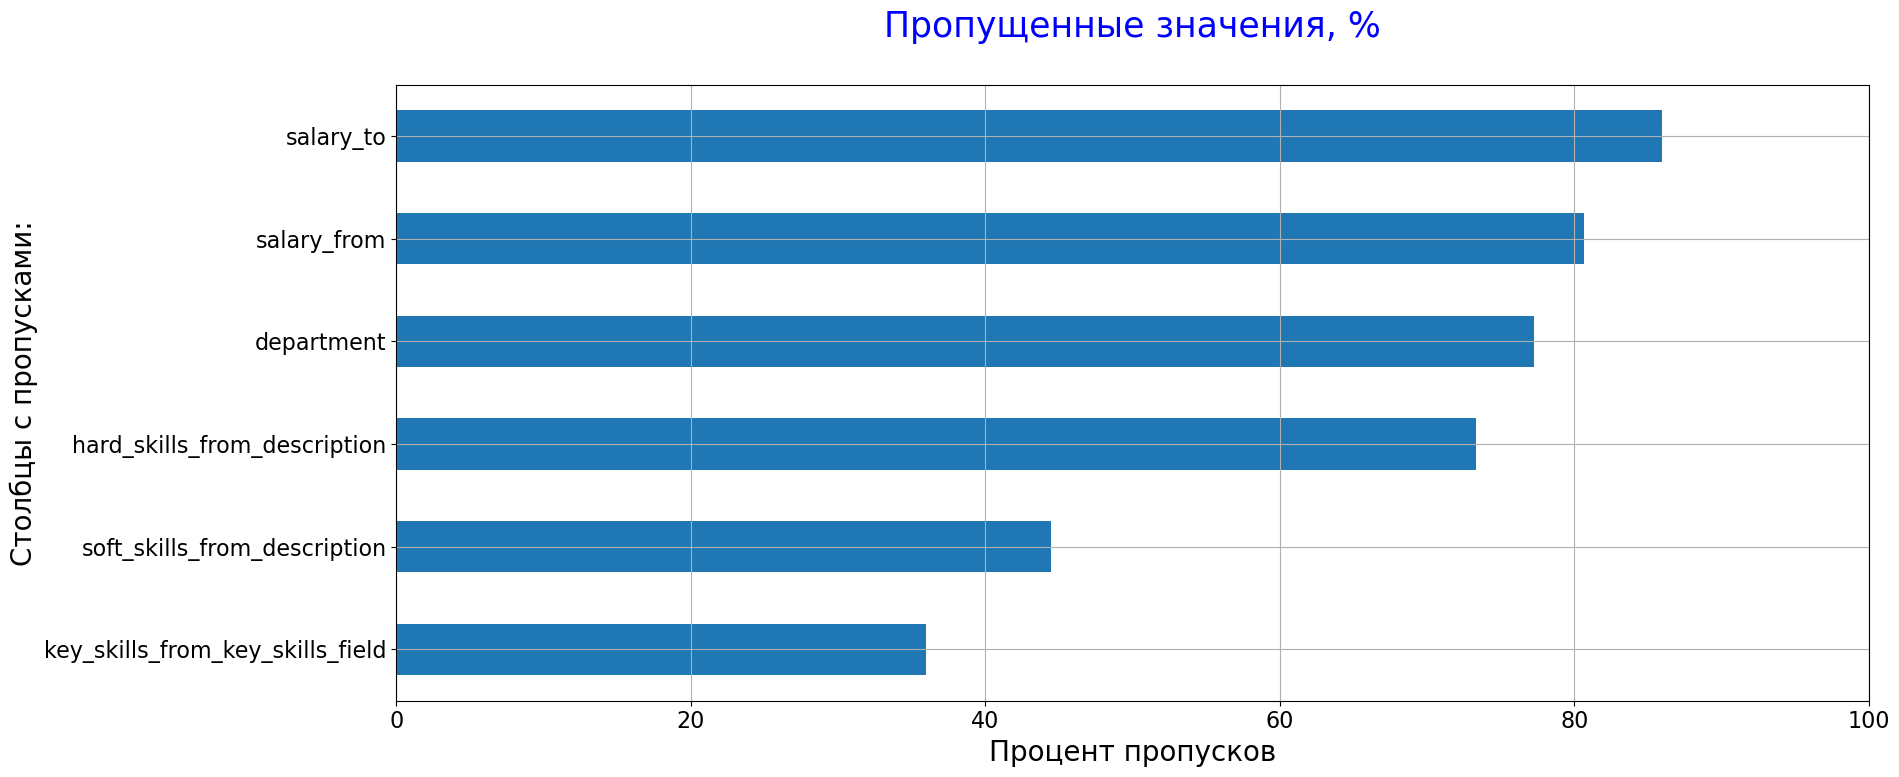

In [ ]:
# Проверим количество пропущенных значений в столбцах:
def pass_value_barh(all_vacansy):
    (all_vacansy.isna().mean()*100)\
    .to_frame()\
    .rename(columns = {0:'space'})\
    .query('space > 0')\
    .sort_values(by = 'space', ascending = True)\
    .plot(kind = 'barh', figsize = (19,8), legend = False, fontsize = 16, grid=True)\
    ;
    plt.title('Пропущенные значения, %' + "\n", fontsize=25, color='Blue')
    plt.xlabel('Процент пропусков', fontsize=20)
    plt.ylabel('Столбцы с пропусками:', fontsize=20)
    plt.xlim(0, 100)
pass_value_barh(all_vacansy)

Пропуски в столбцах:
- **department** - Работодатель, отдел.
- **salary_from** - Нижняя граница предлагаемой заработной платы.
- **salary_to** - Верхняя граница предлагаемой заработной платы.

Заполнять не будем, для дальнейшего анализа не важны. Пропуски по зарплате компенсируются столбцом **salary_bin** - Категория зарплаты.

В столбце **key_skills_from_key_skills_field** пропусков меньше чем в столбцах **hard_skills_from_description**, **soft_skills_from_description**. Для дальнейшего анализа будем использовать его.

### Удаление ненужных столбцов

Столбцы не нужные для дальнейшего анализа:
- **alternate_url** - Ссылка на вакансию.
- **type** - Статус вакансии на момент получения данных от api и передачи их в базу. У всех вакансий одинаковый тип - "открытая".
- **description** - Описание вакансии.
- **description_lemmatized** - Лемматизированное описание вакансии.

In [ ]:
#удаляем ненужные столбцы:
all_vacansy = all_vacansy.drop(columns=['alternate_url', 'type', 'description', 'description_lemmatized'])

In [ ]:
all_vacansy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3499 entries, 0 to 1914
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3499 non-null   int64         
 1   name                              3499 non-null   object        
 2   published_at                      3499 non-null   datetime64[ns]
 3   employer                          3499 non-null   object        
 4   department                        796 non-null    object        
 5   area                              3499 non-null   object        
 6   experience                        3499 non-null   object        
 7   key_skills                        3499 non-null   object        
 8   schedule                          3499 non-null   object        
 9   employment                        3499 non-null   object        
 10  salary_from                       677 non-null    flo

### Проверим столбцы на наличие аномалий

In [ ]:
# Количество уникальных названий вакансий
all_vacansy['name'].nunique()

1574

In [ ]:
all_vacansy['name'].value_counts()

name
Системный аналитик                                     564
Аналитик данных                                        413
Data Analyst                                            80
Системный аналитик 1С                                   62
Ведущий системный аналитик                              48
                                                      ... 
Аналитик данных в команду платформы АБ-тестирования      1
Младший аналитик данных (Астра Консалтинг)               1
Data analysts                                            1
Аналитик данных CV (Северсталь Диджитал)                 1
Старший системный аналитик 1C (Sminex Finance)           1
Name: count, Length: 1574, dtype: int64

Большая часть вакансий содержит в названии дополнительную информацию. Для дальнейшего анализа это не имеет значения - оставим без изменения.

In [ ]:
# Даты публикации вакансий (min и max)
print(all_vacansy['published_at'].min().strftime("%d-%m-%Y"))
print(all_vacansy['published_at'].max().strftime("%d-%m-%Y"))

13-02-2024
09-07-2024


In [ ]:
# Количество уникальных названий работодателей
all_vacansy['employer'].nunique()

1358

In [ ]:
# ТОП-30 уникальных названий работодателей
all_vacansy['employer'].value_counts().head(30)

employer
СБЕР                                     297
Т1                                       101
Aston                                     66
WILDBERRIES                               42
ПСБ (ПАО «Промсвязьбанк»)                 38
Совкомбанк Технологии                     37
Ozon                                      36
МТС                                       35
Банк ВТБ (ПАО)                            31
билайн                                    26
Центральный банк Российской Федерации     25
Selecty                                   24
МАГНИТ, Розничная сеть                    23
Т-Банк                                    22
IBS                                       19
Красное & Белое, розничная сеть           18
Ростелеком Информационные Технологии      18
Лига Цифровой Экономики                   18
Okko                                      17
Прикладные технологии                     16
Правительство Москвы                      15
Гринатом                                  14
Р

In [ ]:
# Количество уникальных названий городов
all_vacansy['area'].nunique()

106

In [ ]:
# ТОП-30 уникальных названий городов
all_vacansy['area'].value_counts().head(30)

area
Москва                          2215
Санкт-Петербург                  379
Екатеринбург                     106
Новосибирск                       81
Казань                            79
Нижний Новгород                   64
Краснодар                         49
Самара                            40
Владивосток                       38
Ростов-на-Дону                    33
Воронеж                           31
Пермь                             29
Тюмень                            24
Челябинск                         24
Томск                             20
Красноярск                        16
Саратов                           15
Уфа                               14
Калининград                       12
Омск                              10
Тверь                             10
Владимир                           9
Ульяновск                          8
Ижевск                             8
Кемерово                           7
Рязань                             7
Иваново (Ивановская область)     

In [ ]:
# Количество значений по опыту работы
all_vacansy['experience'].value_counts()

experience
Junior+ (1-3 years)      1822
Middle (3-6 years)       1411
Junior (no experince)     211
Senior (6+ years)          55
Name: count, dtype: int64

In [ ]:
# Количество значений по типу занятости
all_vacansy['employment'].value_counts()

employment
Полная занятость       3429
Стажировка               43
Частичная занятость      20
Проектная работа          7
Name: count, dtype: int64

In [ ]:
# Количество значений по графику работы
all_vacansy['schedule'].value_counts()

schedule
Полный день         2471
Удаленная работа     923
Гибкий график         96
Сменный график         9
Name: count, dtype: int64

In [ ]:
# Количество значений по категории зарплаты
all_vacansy['salary_bin'].value_counts()

salary_bin
ЗП не указана                3007
От 100 тысяч до 200 тысяч     169
От 200 тысяч до 300 тысяч     115
Больше 300 тысяч              106
Меньше 100 тысяч              102
Name: count, dtype: int64

In [ ]:
# Количество уникальных значений ключевых навыков
all_vacansy['key_skills_from_key_skills_field'].nunique()

1795

In [ ]:
# ТОП-30 уникальных значений ключевых навыков
all_vacansy['key_skills_from_key_skills_field'].value_counts().head(30)

key_skills_from_key_skills_field
SQL, Python                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    27
UML, BPMN, SQL, REST, SOAP, RabbitMQ, Kafka                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
# Количество уникальных значений ключевых навыков
all_vacansy['key_skills'].nunique()

1899

In [ ]:
# ТОП-30 уникальных значений ключевых навыков
all_vacansy['key_skills'].value_counts().head(30)

key_skills
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           461
['Документация']                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
# Количество уникальных “Твердых” навыков
all_vacansy['hard_skills_from_description'].nunique()

9

In [ ]:
# ТОП уникальных “Твердых” навыков
all_vacansy['hard_skills_from_description'].value_counts().head(10)

hard_skills_from_description
confluence                    620
Pandas                        238
Юнит-экономика                 36
Pandas, confluence             24
confluence, Юнит-экономика      9
Pandas, Юнит-экономика          3
Google Sheets                   2
Pandas, Google Sheets           1
Математическая статистика       1
Name: count, dtype: int64

In [ ]:
# Количество уникальных “Мягких” навыков
all_vacansy['soft_skills_from_description'].nunique()

46

In [ ]:
# ТОП уникальных “Мягких” навыков
all_vacansy['hard_skills_from_description'].value_counts().head(10)

hard_skills_from_description
confluence                    620
Pandas                        238
Юнит-экономика                 36
Pandas, confluence             24
confluence, Юнит-экономика      9
Pandas, Юнит-экономика          3
Google Sheets                   2
Pandas, Google Sheets           1
Математическая статистика       1
Name: count, dtype: int64

## Иследовательский анализ данных

### Количество вакансий

Всего вакансий: 3499
Аналитиков данных: 1592
Системных аналитиков: 1907


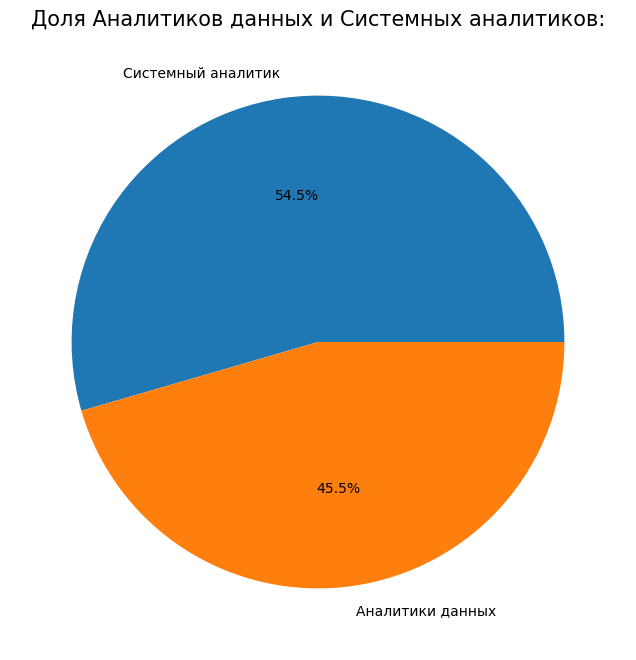

In [ ]:
print('Всего вакансий:', all_vacansy.shape[0])
print('Аналитиков данных:', (all_vacansy['vacancy_type'] == 'da').sum())
print('Системных аналитиков:', (all_vacansy['vacancy_type'] == 'ds').sum())

counts = all_vacansy['vacancy_type'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(counts, labels=['Системный аналитик','Аналитики данных'], autopct='%1.1f%%')
plt.title('Доля Аналитиков данных и Системных аналитиков:', fontsize=15)
plt.show()

Вакансий Системный аналитик на 9% больше чем Аналитик данных.

### Выявление грейда требуемых специалистов

In [ ]:
all_experience = all_vacansy['experience'].unique()
sorted(all_experience)

['Junior (no experince)',
 'Junior+ (1-3 years)',
 'Middle (3-6 years)',
 'Senior (6+ years)']

В данных 4 грейда специалистов:
- **Junior** - начинающий специалист без опыта работы;
- **Junior+** - специалист с опытом работы от 1 до 3-х лет;
- **Middle** - опытный специалист с опытом от 3-х до 6-ти лет;
- **Senior** - ксперт с опытом более 6-ти лет.

### Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Системный аналитик

In [ ]:
# Отфильтруем вакансий по типу, подсчетаем количество и отсортируем:
da=all_vacansy.loc[all_vacansy['vacancy_type']== 'da']['experience'].value_counts().sort_index()
sa=all_vacansy.loc[all_vacansy['vacancy_type']== 'ds']['experience'].value_counts().sort_index()

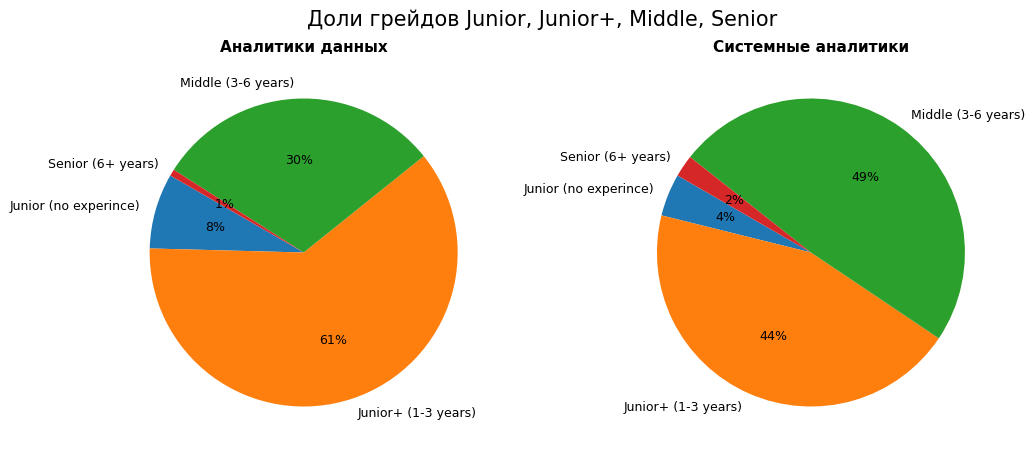

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# круговая диаграмма по аналитикам данных:
ax[0].pie(da,
          labels= [lbl for lbl, value in da.items()],
          startangle=150,
          autopct='%1.f%%',
          textprops={'fontsize': 9})
ax[0].set_title('Аналитики данных', fontsize=11, fontweight='bold')
# круговая диаграмма для Системных аналитиков
ax[1].pie(sa,
          labels= [lbl for lbl, value in sa.items()],
          startangle=150,
          autopct='%1.f%%',
          textprops={'fontsize': 9})
ax[1].set_title('Системные аналитики', fontsize=11, fontweight='bold')

plt.suptitle('Доли грейдов Junior, Junior+, Middle, Senior', fontsize=15)
plt.show()

**Вывод:**
- У Аналитиков данных более востребованы специалисты с грейдом Junior+ и в два раза меньше специалисты Middle.
- У Системных аналитиков наоборот Middle на 5% больше Junior+.
- Вакансии для специалистов Senior встречаются редко в обоях специальностях.
- Для специалистов грейда Junior легче устроится по специалности Аналитик данных.

### Определение типичного места работы для Аналитика данных и Системного аналитика

In [ ]:
# Отфильтруем вакансий по типу, подсчетаем количество и отсортируем:
da=all_vacansy.loc[all_vacansy['vacancy_type']== 'da']['employer'].value_counts().reset_index().head(20)
sa=all_vacansy.loc[all_vacansy['vacancy_type']== 'ds']['employer'].value_counts().reset_index().head(20)

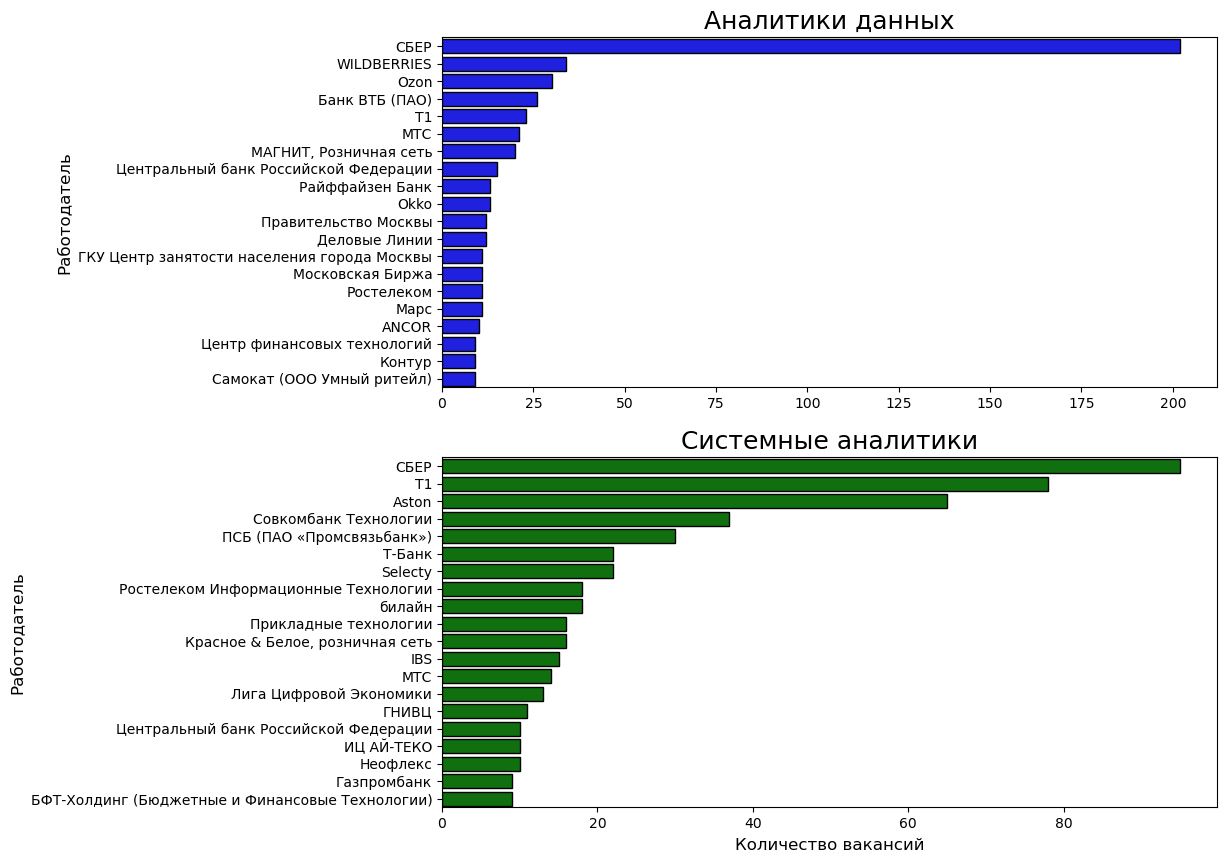

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# График для аналитиков данных
sns.barplot(y='employer', x='count', data=da, ax=ax[0], color='blue', ec='black')
ax[0].set_title('Аналитики данных', size=18)
ax[0].set_xlabel(' ')
ax[0].set_ylabel('Работодатель', labelpad=5, size=12)

# График для аналитиков данных
sns.barplot(y='employer', x='count', data=sa, ax=ax[1], color='green', ec='black')
ax[1].set_title('Системные аналитики', size=18)
ax[1].set_xlabel('Количество вакансий', labelpad=5, size=12)
ax[1].set_ylabel('Работодатель', size=12)

plt.show()

**Вывод:**
- Больше всего вакансий для Аналитиков данных предлагает СБЕР.
- Для Системных аналитиков выбор работадателей шире. Больше всего вакансий предлогают СБЕР, Т1, Aston.

#### ТОП-работодателей

In [ ]:
# Создадим функцию которая будет выводить графики интересующих нас категорий в разрезе грейдов
# Построим графики с рейтингом скилов
# Сформируем поле для диаграмм
def grade(df, indicator_, title_):

    fig, ax = plt.subplots(2, 4, figsize=(25, 10))
    plt.suptitle(title_ + ' для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')

    experience = ['Junior (no experince)',
                  'Junior+ (1-3 years)',
                  'Middle (3-6 years)',
                  'Senior (6+ years)']

    for i in range(len(experience)):
      da_skils = (
          df.loc[(df['vacancy_type'] == 'da') & (df['experience'] == f'{experience[i]}')
          , indicator_]
          .value_counts()).reset_index().head(10)
      ds_skils = (
          df.loc[(df['vacancy_type'] == 'ds') & (df['experience'] == f'{experience[i]}')
          , indicator_]
          .value_counts()).reset_index().head(10)

      # График для Аналитиков данных
      sns.barplot(x='count', y=indicator_, data=da_skils, ax=ax[0, i], color='blue')
      ax[0, i].set_title(f"Аналитики данных {experience[i]}", fontsize=14)
      ax[0, i].set_xlabel('')
      ax[0, i].set_ylabel('')

      # График для Системных аналитиков
      sns.barplot(x='count', y=indicator_, data=ds_skils, ax=ax[1, i], color='green')
      ax[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
      ax[1, i].set_xlabel('')
      ax[1, i].set_ylabel('')

    plt.subplots_adjust(wspace = 0.8)
    plt.show()

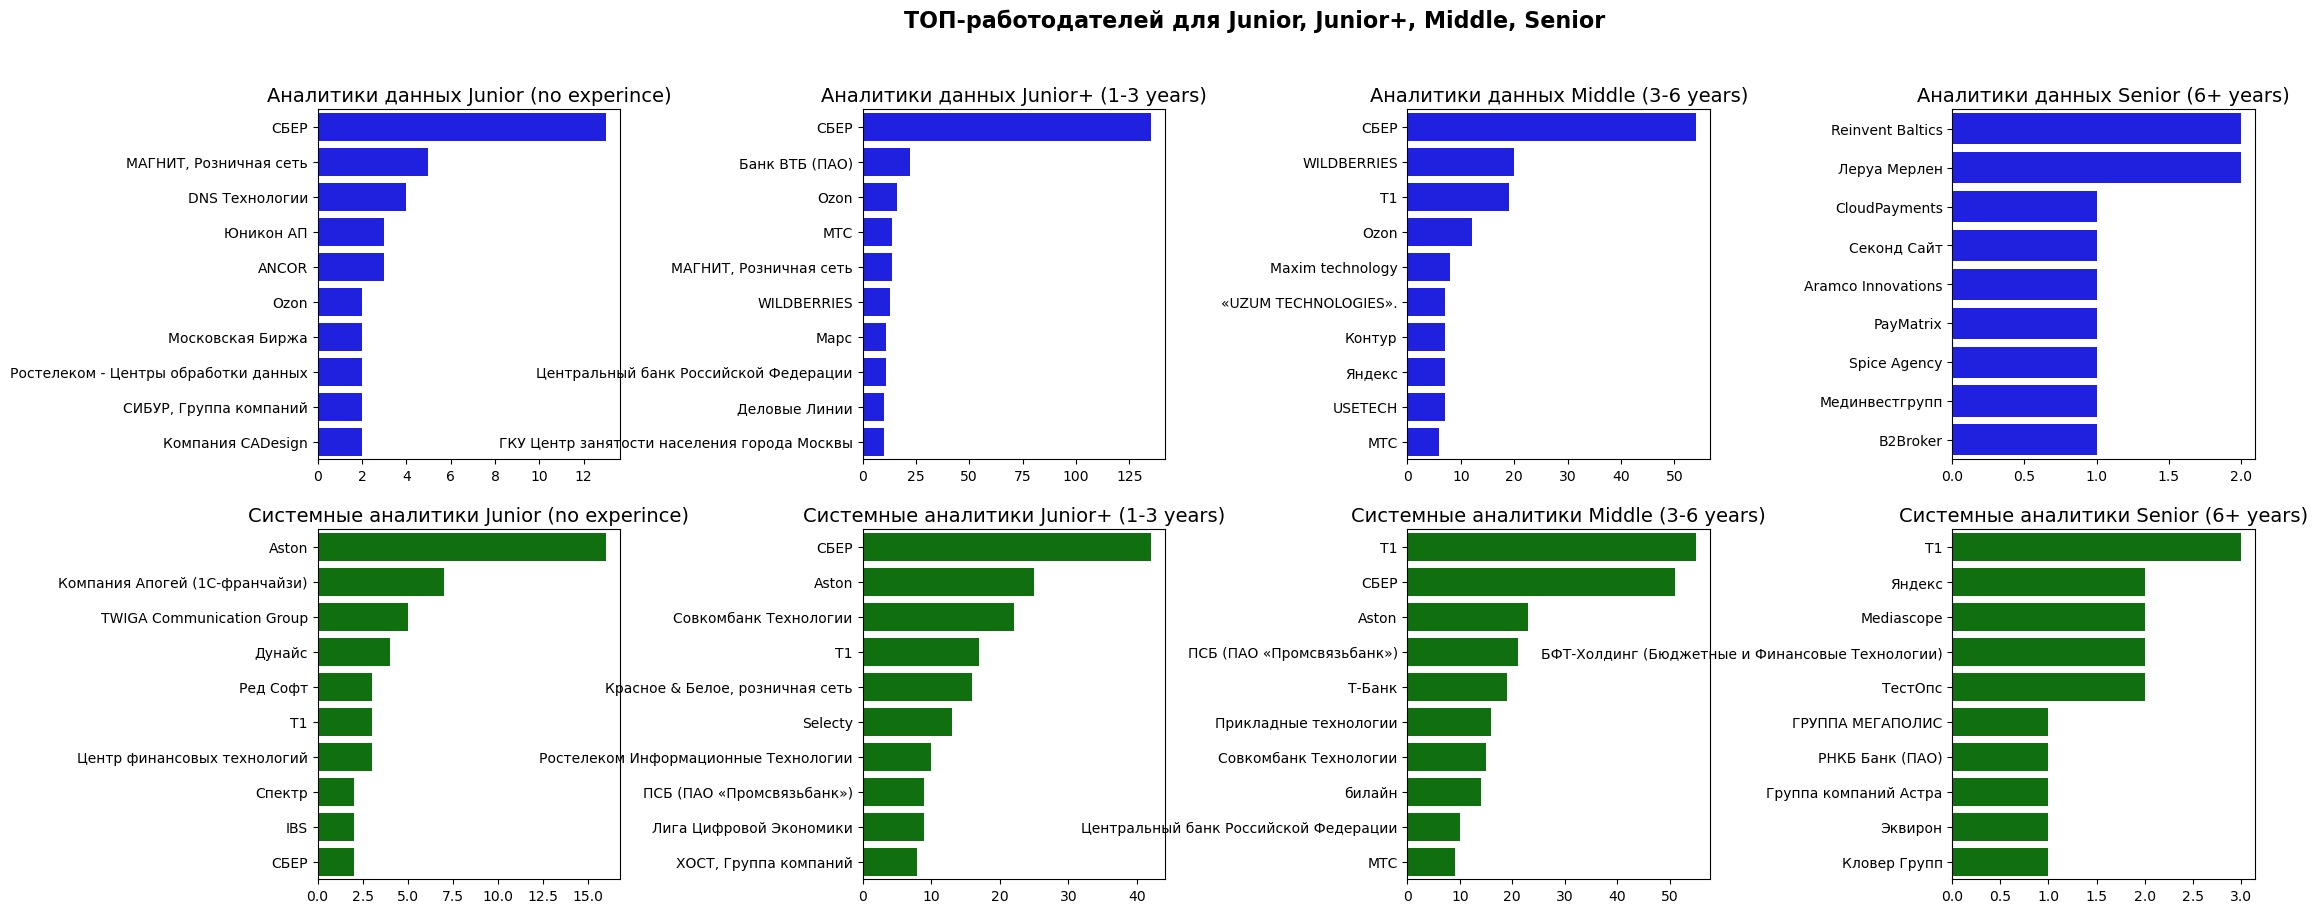

In [ ]:
# Графики ТОП-10 работодателей по грейдам
df = all_vacansy
indicator_ = 'employer'
title_ = 'ТОП-работодателей'
grade(df, indicator_, title_)

По всем грейдам больше всех вакансий предлагает СБЕР. <br>
**Аналитики данных**:
- Junior без опыта: СБЕР, МАГНИТ, DNS
- Junior+: СБЕР, ВТБ, OZON
- Middle: СБЕР, WILDBERRIES, T1
- Senior: Rainvent Baltics, Леруа Мерлен

**Системный аналитик**:
- Junior без опыта: Aston, Компания Апогей, Twiga Communication group
- Junior+: СБЕР, Aston, Совкомбанк
- Middle: T1, СБЕР, Aston
- Senior: Т1, Яндекс, Mediascope, БФТ-Холдинг.

#### Зарплата

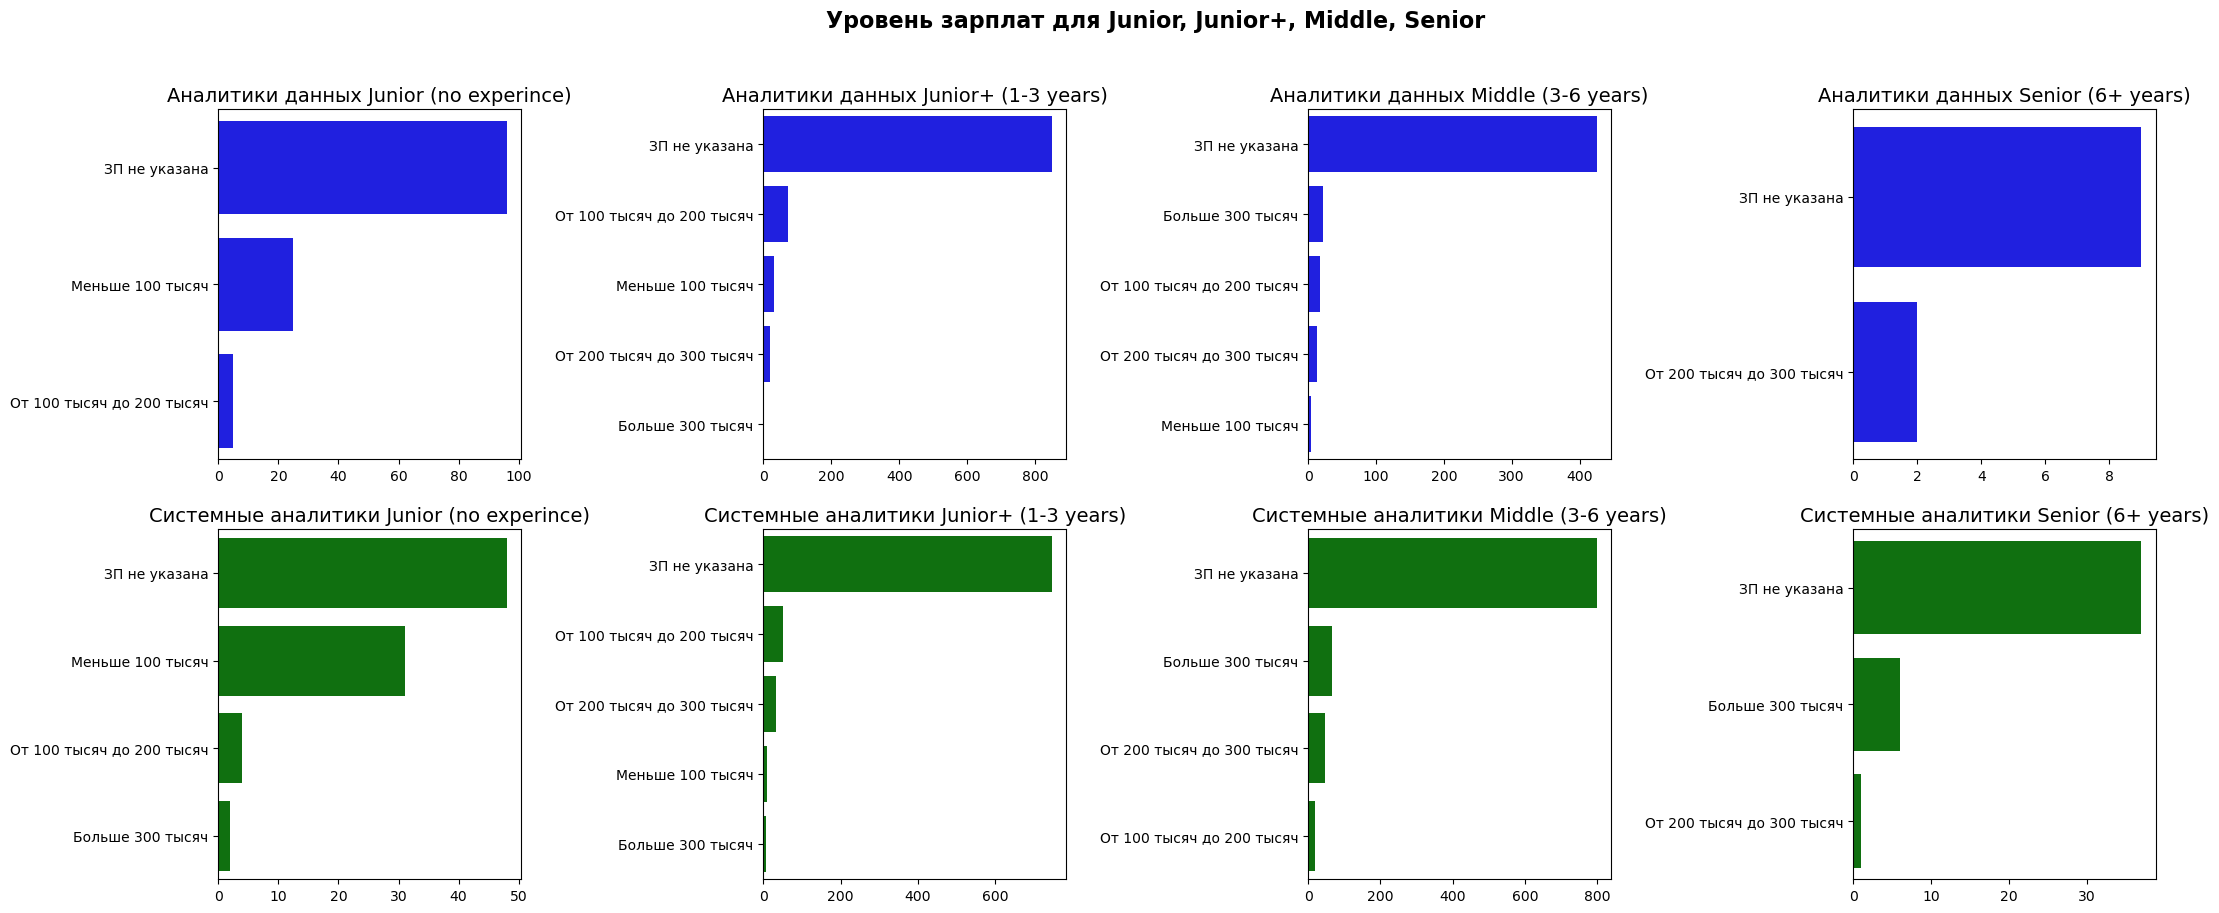

In [ ]:
# Графики уровня зарпат по грейдам
df = all_vacansy
indicator_ = 'salary_bin'
title_ = 'Уровень зарплат'
grade(df, indicator_, title_)

Анализ уровня зарплат показывает следующее:
- У большинства вакансий ЗП не указана.

- Менее 100 тысяч рублей предлагается только специалистам уровня Junior и Junior+.

- От 100 до 200 тысяч рублей предлагается специалистам Junior+.

- От 200 до 300 тысяч рублей - для соискателей уровня Middle.

- Зарплата более 300 тысяч рублей встречается у специалистов Middle и Senior.

#### Тип занятости

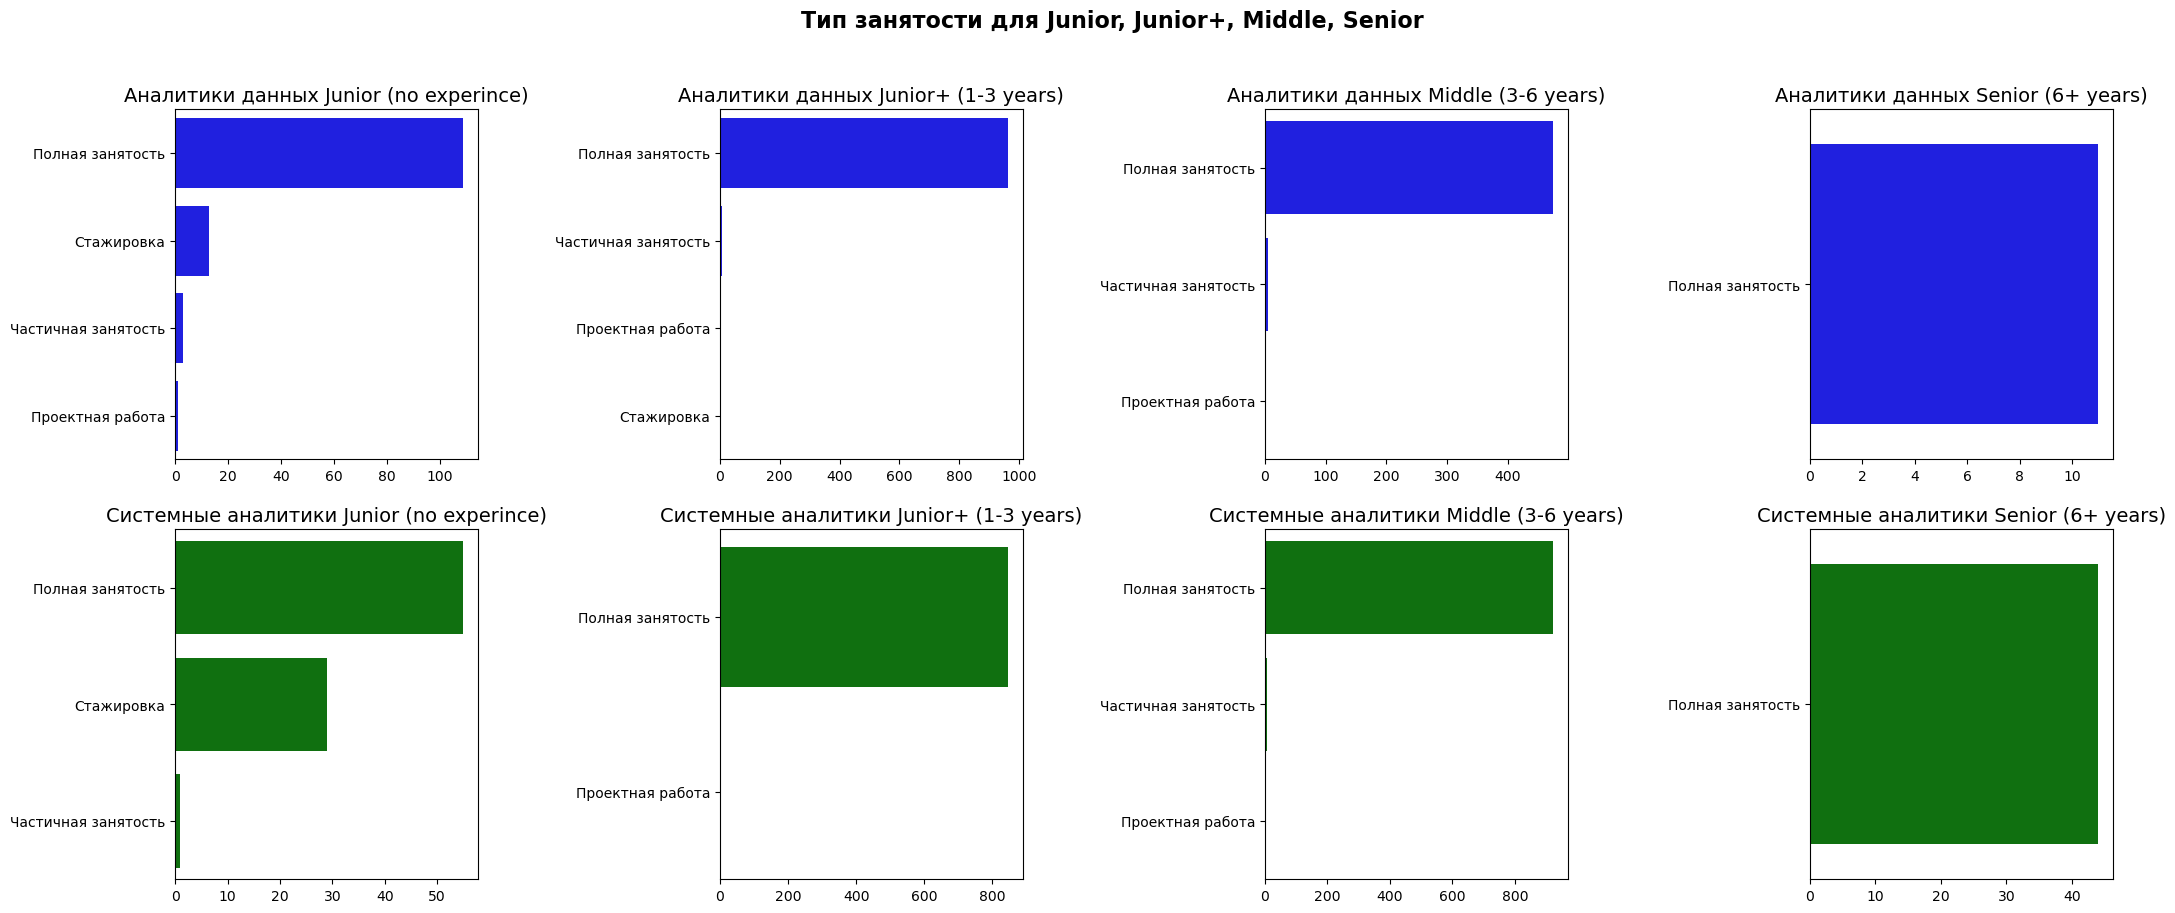

In [ ]:
# Графики типа занятости по грейдам
df = all_vacansy
indicator_ = 'employment'
title_ = 'Тип занятости'
grade(df, indicator_, title_)

По всем вакансиям требуются постоянные сотрудники на полный рабочий день.  Для грейда Junior так же предлогается стажировка.

#### График работы

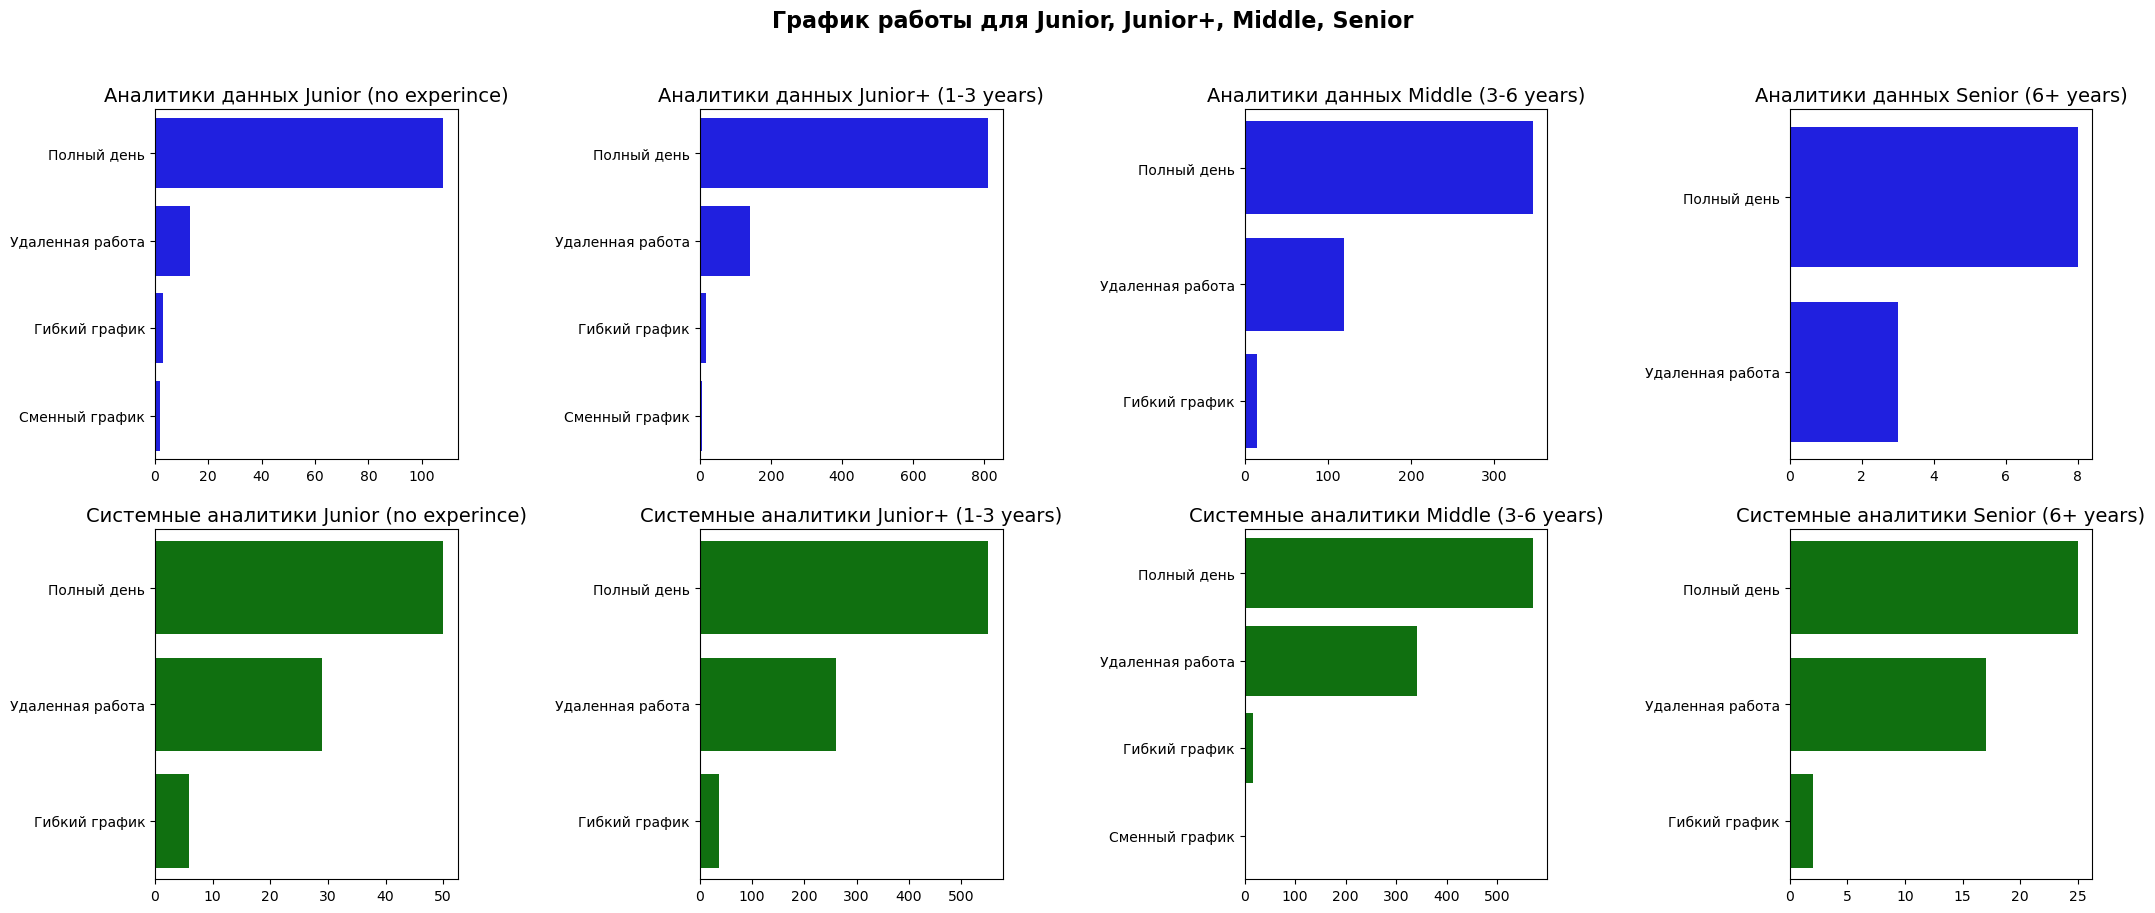

In [ ]:
# График работы по грейдам
df = all_vacansy
indicator_ = 'schedule'
title_ = 'График работы'
grade(df, indicator_, title_)

По всем вакансиям предлагается в основном полный рабочий день. Так же предлагается формат удалённой работы, при чём для системных аналитиков таких предложений больше.

### Определение какие навыки спрашивают чаще

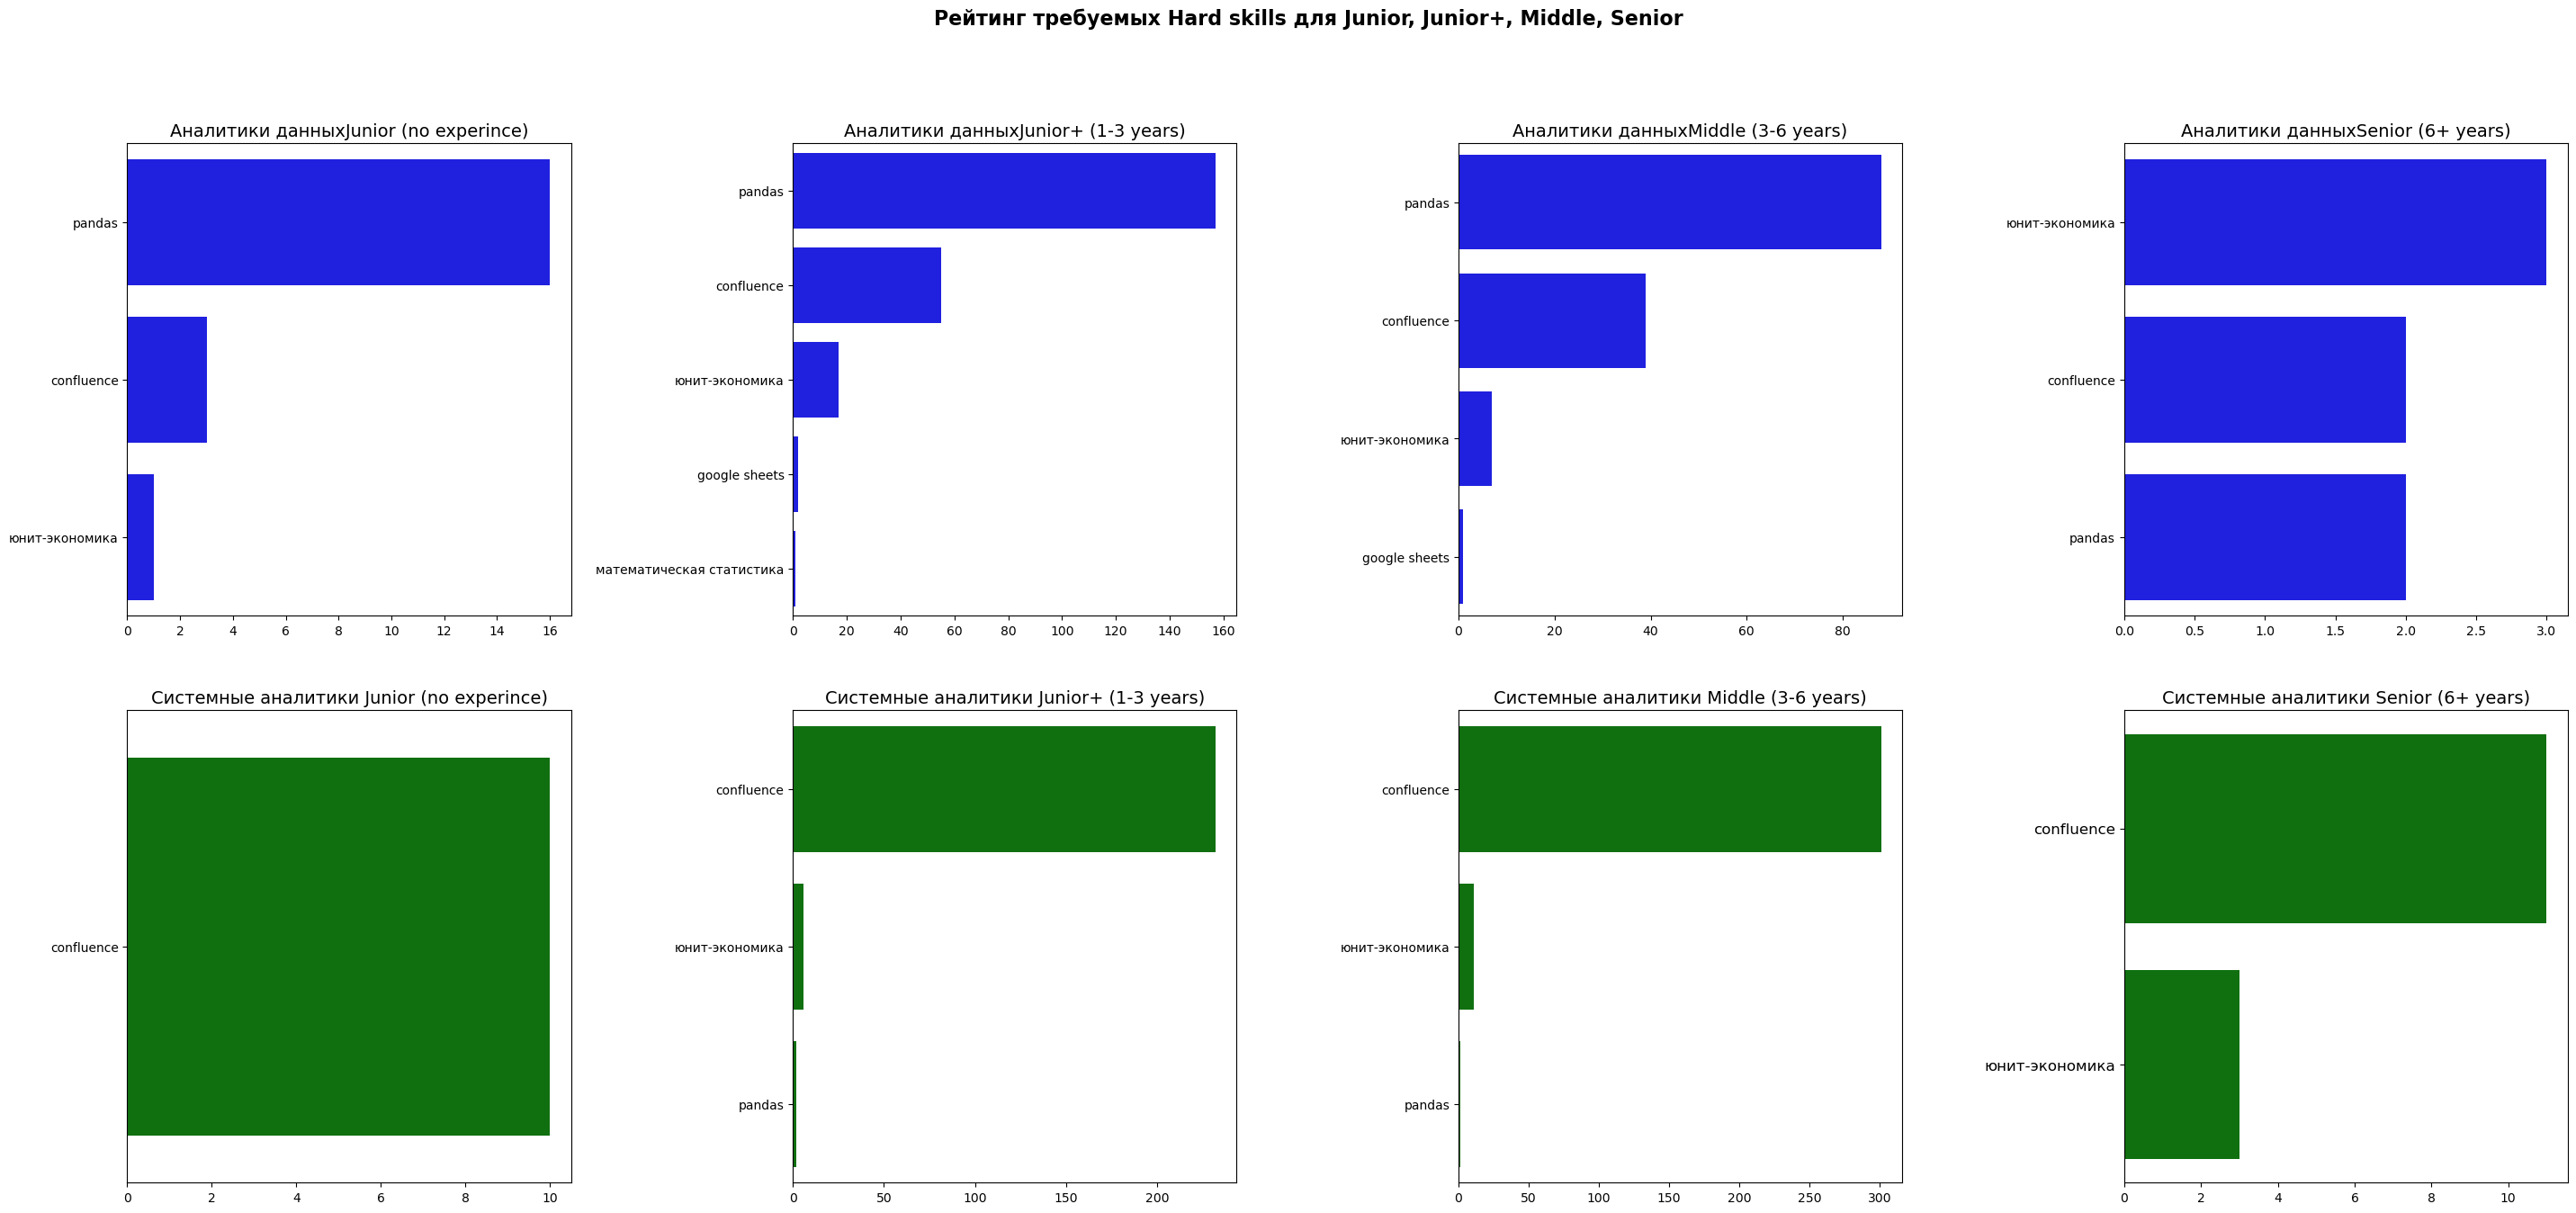

In [ ]:
# Подготовка и составление рейтинга востребованных Hard skills
all_skills = all_vacansy[['id',
                         'vacancy_type',
                         'experience',
                         'hard_skills_from_description'
                         ]].reset_index(drop=True)

# преобразование перечня скилов в список
all_skills['hard_skills_from_description'] = all_skills['hard_skills_from_description'].str.split(',')
# Вывод каждого скила отдельной строкой
all_skills = all_skills.explode('hard_skills_from_description')
# приводим данные к нижнему регистру и убираем пробелы
all_skills['hard_skills_from_description'] = (all_skills['hard_skills_from_description']
                                                 .str.lower().str.strip())

# Поле для диаграмм
fig, ax = plt.subplots(2, 4, figsize=(35, 15))
plt.suptitle('Рейтинг требуемых Hard skills для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skills = (
      all_skills.loc[(all_skills['vacancy_type'] == 'da') & (all_skills['experience'] == f'{experience[i]}')
      , 'hard_skills_from_description']
      .value_counts()).reset_index().head(10)
  sa_skills = (
      all_skills.loc[(all_skills['vacancy_type'] == 'ds') & (all_skills['experience'] == f'{experience[i]}')
      , 'hard_skills_from_description']
      .value_counts()).reset_index().head(10)

  # График для аналитиков данных
  sns.barplot(x='count', y='hard_skills_from_description', data=da_skills, ax=ax[0, i], color='blue')
  ax[0, i].set_title(f"Аналитики данных{experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')

  # График для Системных аналитиков
  sns.barplot(x='count', y='hard_skills_from_description', data=sa_skills, ax=ax[1, i], color='green')
  ax[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')

plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 0.5)
plt.show()

Для аналитиков данных и системных аналитиков основными "твёрдыми" наваками являются Pandas, система Confluence и юнит-экономика.

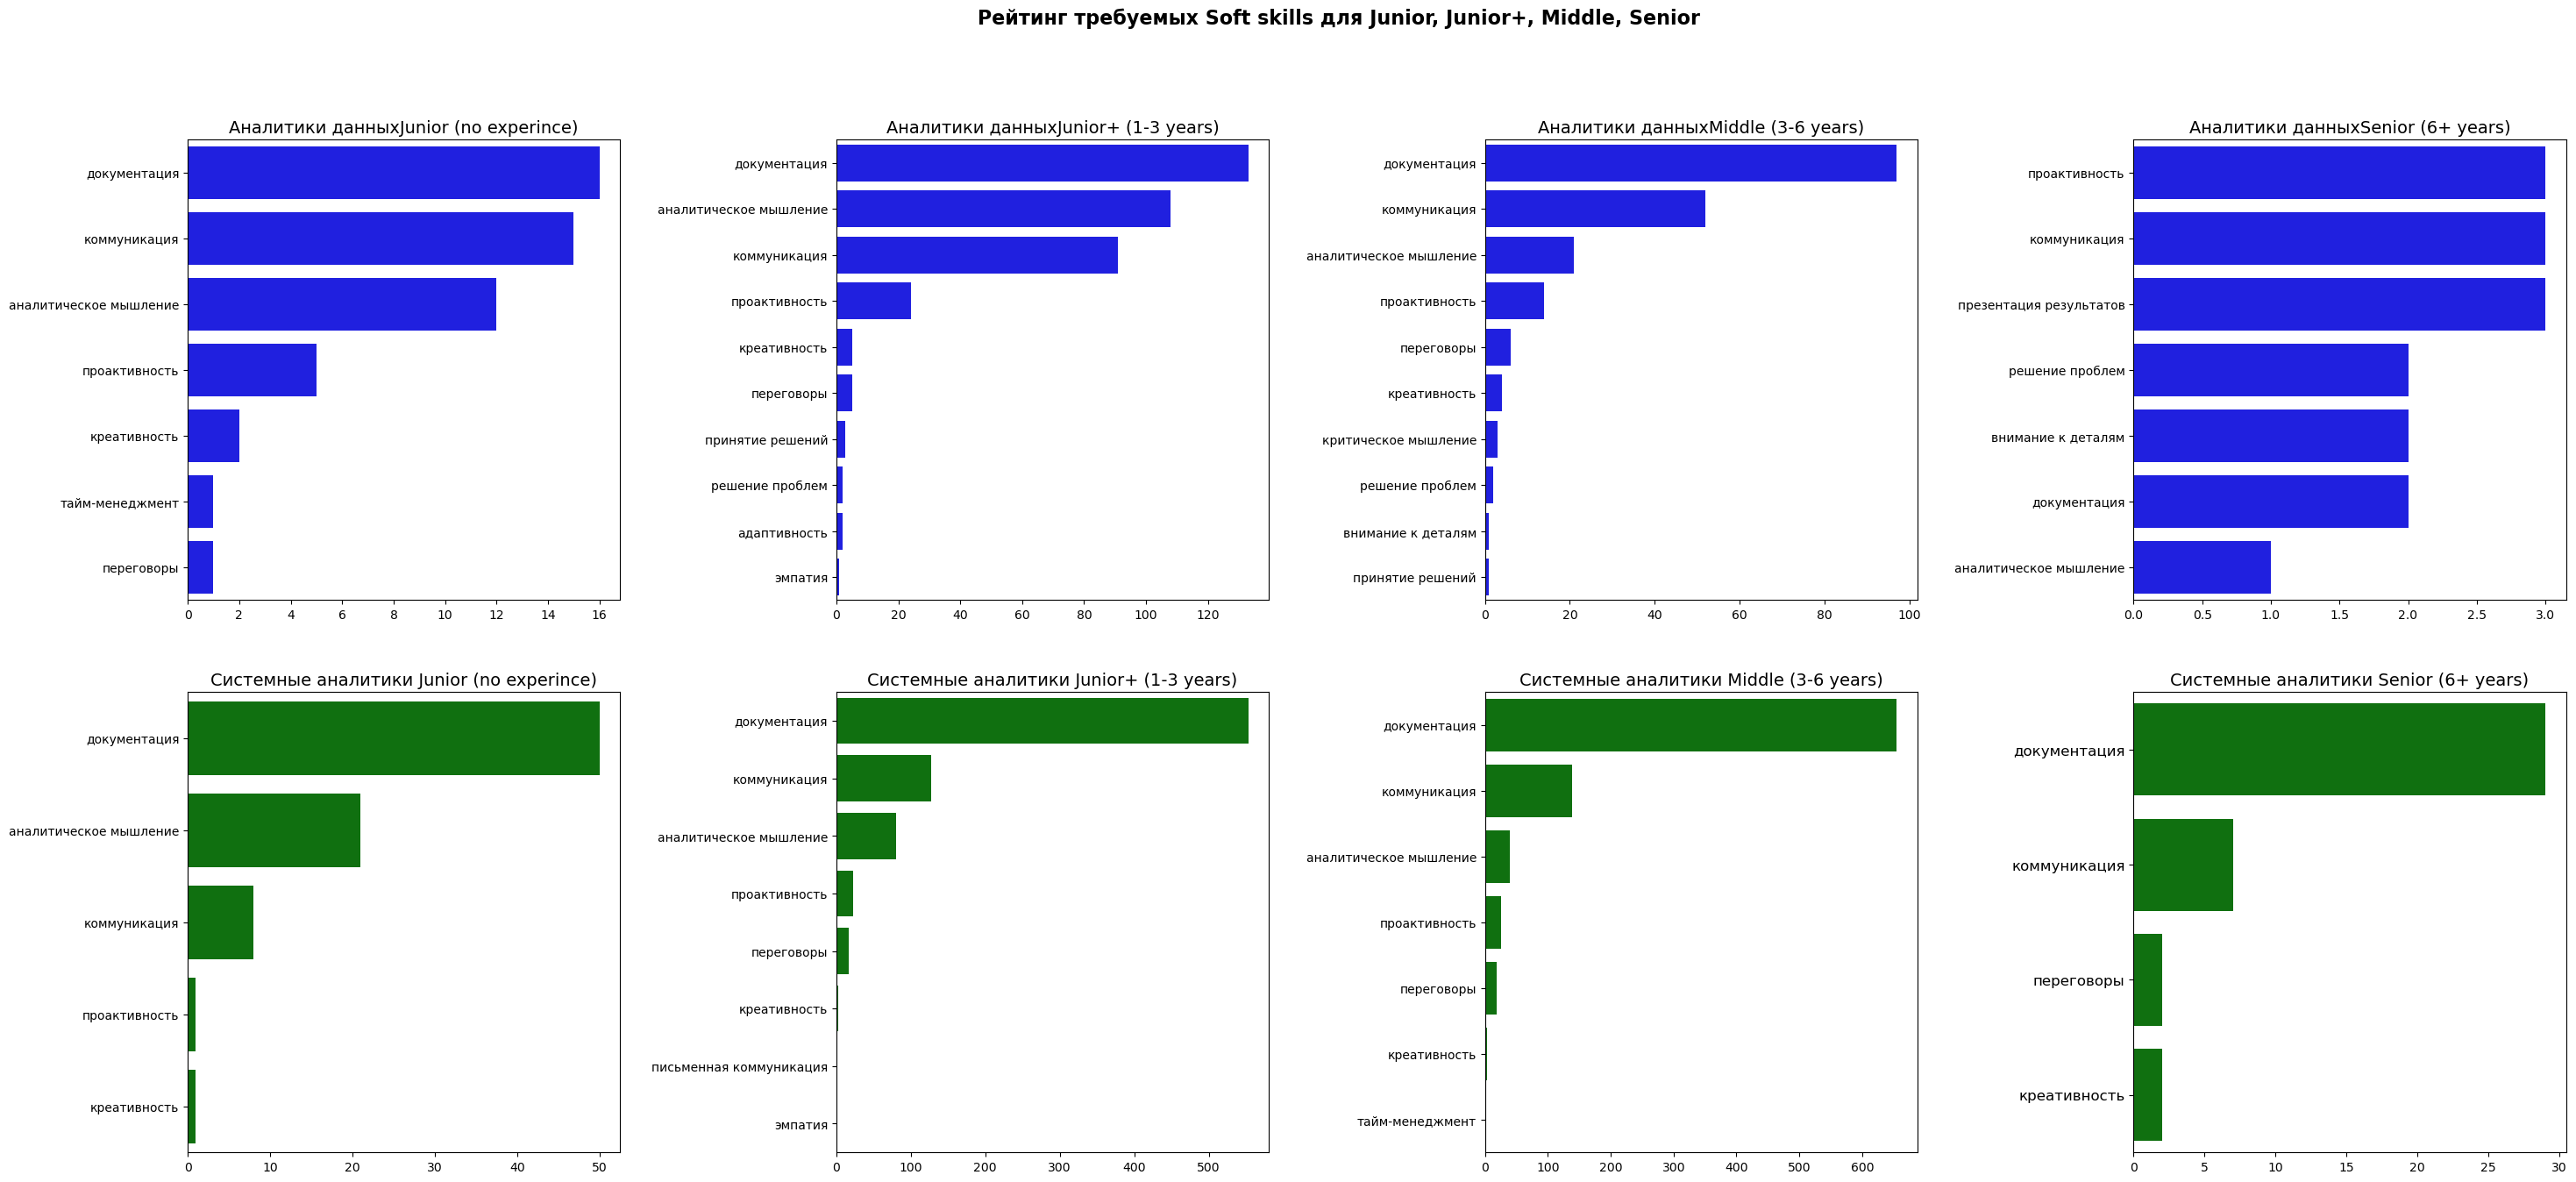

In [ ]:
# Подготовка и составление рейтинга востребованных Soft skills
all_skills = all_vacansy[['id',
                         'vacancy_type',
                         'experience',
                         'soft_skills_from_description'
                         ]].reset_index(drop=True)

# преобразование перечня скилов в список
all_skills['soft_skills_from_description'] = all_skills['soft_skills_from_description'].str.split(',')
# Вывод каждого скила отдельной строкой
all_skills = all_skills.explode('soft_skills_from_description')
# приводим данные к нижнему регистру и убираем пробелы
all_skills['soft_skills_from_description'] = (all_skills['soft_skills_from_description']
                                                 .str.lower().str.strip())

# Поле для диаграмм
fig, ax = plt.subplots(2, 4, figsize=(35, 15))
plt.suptitle('Рейтинг требуемых Soft skills для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skills = (
      all_skills.loc[(all_skills['vacancy_type'] == 'da') & (all_skills['experience'] == f'{experience[i]}')
      , 'soft_skills_from_description']
      .value_counts()).reset_index().head(10)
  sa_skills = (
      all_skills.loc[(all_skills['vacancy_type'] == 'ds') & (all_skills['experience'] == f'{experience[i]}')
      , 'soft_skills_from_description']
      .value_counts()).reset_index().head(10)

  # График для аналитиков данных
  sns.barplot(x='count', y='soft_skills_from_description', data=da_skills, ax=ax[0, i], color='blue')
  ax[0, i].set_title(f"Аналитики данных{experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')

  # График для Системных аналитиков
  sns.barplot(x='count', y='soft_skills_from_description', data=sa_skills, ax=ax[1, i], color='green')
  ax[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')

plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 0.5)
plt.show()

К обеим вакансиям основные "мягкими" навыками являются документация, коммуникация и аналитическое мышление.<br>
Можно заметить что для аналитиков данных немног больше требований к основным навыкам.

### Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный аналитик

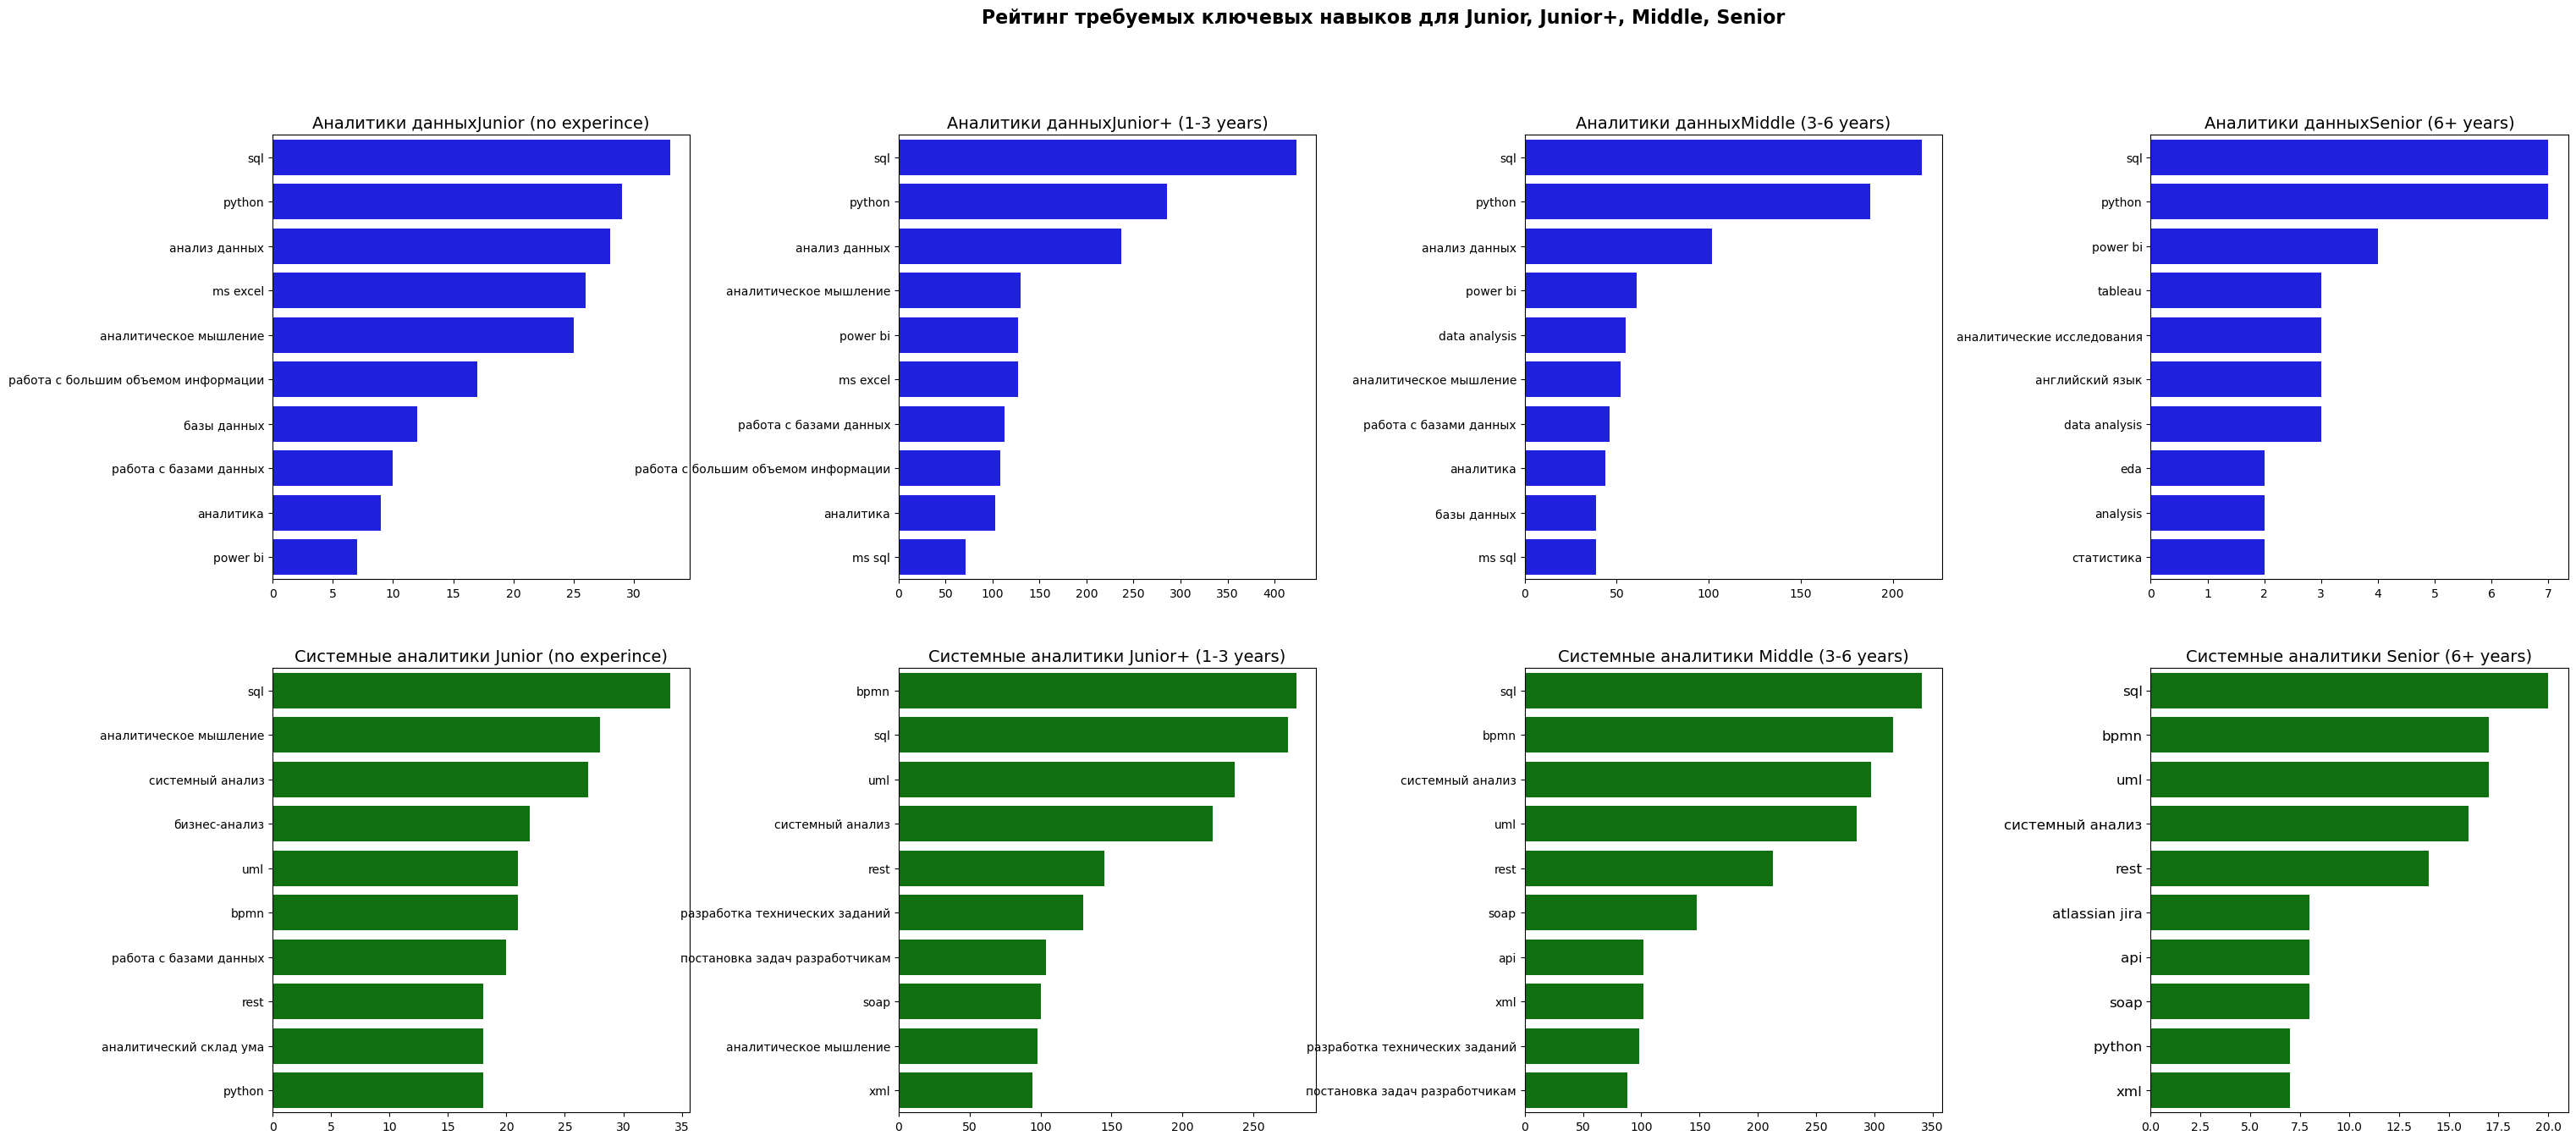

In [ ]:
# Подготовка и составление рейтинга востребованных Soft skills
all_skills = all_vacansy[['id',
                         'vacancy_type',
                         'experience',
                         'key_skills_from_key_skills_field'
                         ]].reset_index(drop=True)

# преобразование перечня скилов в список
all_skills['key_skills_from_key_skills_field'] = all_skills['key_skills_from_key_skills_field'].str.split(',')
# Вывод каждого скила отдельной строкой
all_skills = all_skills.explode('key_skills_from_key_skills_field')
# приводим данные к нижнему регистру и убираем пробелы
all_skills['key_skills_from_key_skills_field'] = (all_skills['key_skills_from_key_skills_field']
                                                 .str.lower().str.strip())

# Поле для диаграмм
fig, ax = plt.subplots(2, 4, figsize=(35, 15))
plt.suptitle('Рейтинг требуемых ключевых навыков для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skills = (
      all_skills.loc[(all_skills['vacancy_type'] == 'da') & (all_skills['experience'] == f'{experience[i]}')
      , 'key_skills_from_key_skills_field']
      .value_counts()).reset_index().head(10)
  sa_skills = (
      all_skills.loc[(all_skills['vacancy_type'] == 'ds') & (all_skills['experience'] == f'{experience[i]}')
      , 'key_skills_from_key_skills_field']
      .value_counts()).reset_index().head(10)

  # График для аналитиков данных
  sns.barplot(x='count', y='key_skills_from_key_skills_field', data=da_skills, ax=ax[0, i], color='blue')
  ax[0, i].set_title(f"Аналитики данных{experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')

  # График для Системных аналитиков
  sns.barplot(x='count', y='key_skills_from_key_skills_field', data=sa_skills, ax=ax[1, i], color='green')
  ax[1, i].set_title(f"Системные аналитики {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')

plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 0.5)
plt.show()

- Для аналитиков данных основные ключевые навыки - владение SQL, Python, анализ данных и знание инструментов построения дашбордов.
- Для системных аналитиков - SQL, владение системным анализом, UML и BPMN.

## Формулирование выводов и рекомендаций

В ходе иследования данных вакансий с сайта HH.ru по специальностям Системных аналитик и Аналитик данных:
- Была проведена предобработка данных: объеденены данные, удалены дублирующие вакансии.
- Выяснили что период иследования: с 13 февраля по 9 июля 2024 года.
- ТОП организаций по числу вакансий: СБЕР, Т1, Aston, WILDBERRIES, ПСБ, Совкомбанк, Ozon, МТС, ВТБ, Билайн.
- ТОП городов: Москва, Санкт-Петербург, Екатеринбург, Новосибирск, Казань.

В ходе иследования данных установили:
- Вакансий Системный аналитик на 9% больше чем Аналитик данных.
- В данных 4 грейда специалистов: Junior - начинающий специалист без опыта работы; Junior+ - специалист с опытом работы от 1 до 3-х лет; Middle - опытный специалист с опытом от 3-х до 6-ти лет; Senior - ксперт с опытом более 6-ти лет.
- У Аналитиков данных более востребованы специалисты с грейдом Junior+, У Системных аналитиков наоборот Middle. Для начинающих специалистов грейда Junior легче устроится по специалности Аналитик данных.
- Больше всего вакансий для Аналитиков данных предлагает СБЕР.Для Системных аналитиков выбор работадателей шире, больше всего вакансий предлагают СБЕР, Т1, Aston.
- У большинства вакансий ЗП не указана. Менее 100 тысяч рублей предлагается только специалистам уровня Junior и Junior+. От 100 до 200 тысяч рублей предлагается специалистам Junior+. От 200 до 300 тысяч рублей - для соискателей уровня Middle. Зарплата более 300 тысяч рублей встречается у специалистов Middle и Senior.
- По всем вакансиям требуются постоянные сотрудники на полный рабочий день. Для грейда Junior так же предлогается стажировка.
- По всем вакансиям предлагается в основном полный рабочий день. Так же предлагается формат удалённой работы, при чём для системных аналитиков таких предложений больше.
- Для аналитиков данных и системных аналитиков основными "твёрдыми" наваками являются Pandas, система Confluence и юнит-экономика.
- К обеим вакансиям основные "мягкими" навыками являются документация, коммуникация и аналитическое мышление.
- Для аналитиков данных немног больше требований к основным навыкам.
- Для аналитиков данных основные ключевые навыки - владение SQL, Python, анализ данных и знание инструментов построения дашбордов. Для системных аналитиков - SQL, владение системным анализом, UML и BPMN.

**Вывод:**

Анализ данных вакансий на сайте HH.ru по специальностям Системный аналитик и Аналитик данных показал, что эти профессии пользуются большим спросом, особенно в крупных городах и ведущих компаниях.

**Рекомендации:**

- **Выбор специальности:** Если вы начинающий специалист без опыта работы, вам может быть проще устроиться на должность Аналитика данных. Однако, если у вас есть опыт работы от 3 до 6 лет, то специальность Системного аналитика может предложить больше возможностей.
- **Изучение навыков:** Обе специальности требуют владения SQL, Python, но Аналитики данных также должны знать инструменты анализа данных, в то время как Системные аналитики должны владеть системным анализом, UML и BPMN.
- **Поиск работы:** Больше всего вакансий для Аналитиков данных предлагает СБЕР, а для Системных аналитиков выбор работодателей шире, включая СБЕР, Т1 и Aston.
- **Уровень заработной платы:** Зарплаты варьируются в зависимости от уровня специалиста и компании. Начинающим специалистам предлагаются зарплаты менее 100 тысяч рублей, а специалистам уровня Middle и выше – от 200 до 300 тысяч рублей и более.
- **Формат работы:** Большинство вакансий предполагают работу на полный рабочий день, но также предлагается удалённый формат работы, особенно для Системных аналитиков.
- **Навыки и требования:** Обе специальности требуют владения “твёрдыми” навыками, такими как Pandas и система Confluence, а также “мягкими” навыками, такими как документация, коммуникация и аналитическое мышление.
- **Стажировки:** Для начинающих специалистов предлагается стажировка.
- **Удалённая работа:** Для Системных аналитиков предлагается больше вакансий с возможностью удалённой работы.
  
Эти рекомендации помогут вам сделать осознанный выбор специальности, определить необходимые навыки и требования, а также найти подходящую вакансию.